In [2]:
# 此文件实现了对Iris数据集的多种分类任务
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def model_test(y_test,y_pred,average="macro"):
  print("Precision:", metrics.precision_score(y_test, y_pred, average=average))
  print("Recall:", metrics.recall_score(y_test, y_pred, average=average))
  print("f1:", metrics.f1_score(y_test, y_pred, average=average))

def plot_mat(y_test,y_pred):
  mat = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [4]:
# 导入数据集
df = pd.read_csv("german.csv", header=None)
data = np.array(df)
x = data[:, :-1]
y = data[:, -1]

# 朴素贝叶斯

Precision: 0.6985714285714286
Recall: 0.6853036847437743
f1: 0.6903087277882538


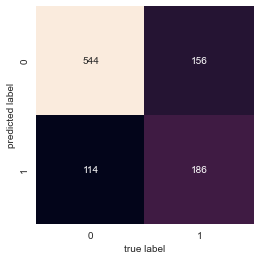

In [5]:
bayes_cls = bayes.GaussianNB()
y_pred = cross_val_predict(bayes_cls,x,y,cv=10)
model_test(y_pred,y)
plot_mat(y_pred,y)

# 逻辑回归

Precision: 0.5495238095238095
Recall: 0.6736111111111112
f1: 0.52309304387544


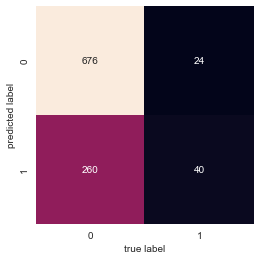

In [6]:
logistic_cls = LogisticRegression(solver='saga',tol=0.1)
y_pred_1 = cross_val_predict(logistic_cls,x,y,cv=10)
model_test(y_pred_1,y)
plot_mat(y_pred_1,y)

# SVM（高斯核）

Precision: 0.5292857142857142
Recall: 0.7184026421392805
f1: 0.4779530667074118


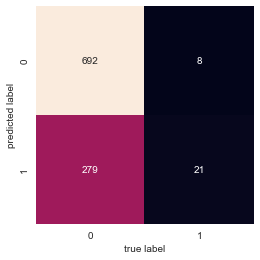

In [7]:
SVC_cls = SVC(kernel="rbf")
y_pred_2 = cross_val_predict(SVC_cls,x,y,cv=10)
model_test(y_pred_2,y)
plot_mat(y_pred_2,y)

# SVM（线性核）

Precision: 0.6795238095238095
Recall: 0.7182774033673777
f1: 0.6915164429512803


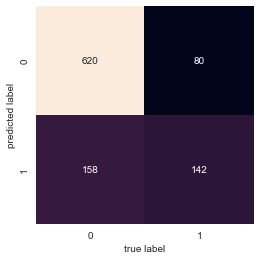

In [8]:
SVC_cls_1 = SVC(kernel="linear")
y_pred_3 = cross_val_predict(SVC_cls_1,x,y,cv=10)
model_test(y_pred_3,y)
plot_mat(y_pred_3,y)

# 决策树

Precision: 0.6442857142857144
Recall: 0.6397111713605932
f1: 0.6417180672446012


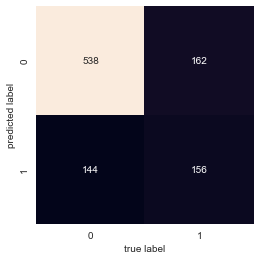

In [9]:
decision_cls = DecisionTreeClassifier()
y_pred_4 = cross_val_predict(decision_cls,x,y,cv=10)
model_test(y_pred_4,y)
plot_mat(y_pred_4,y)

# 随机森林

Precision: 0.6435714285714286
Recall: 0.7051592621071183
f1: 0.655484319046227


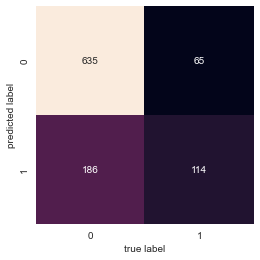

In [10]:
rand_forest_cls = RandomForestClassifier(n_estimators=10)
y_pred_5 = cross_val_predict(rand_forest_cls,x,y,cv=10)
model_test(y_pred_5,y)
plot_mat(y_pred_5,y)